# Insta scraping

Works only on images for now.

#### Librairies

BeautifulSoup is used for scraping (very easy to use) and Selenium because of the JS.
Urllib is used for urls.

First, we install them:
* `conda install -c anaconda beautifulsoup4`.
* `conda install -c anaconda selenium`.

Then we import it and check its version.

In [1]:
# Libraries used
import bs4
from bs4 import BeautifulSoup
import requests
import selenium
import urllib
from urllib import request

In [2]:
print("BeautifulSoup version:", bs4.__version__)
print("Requests version:", requests.__version__)
print("Selenium version:", selenium.__version__)
print("Urllib.request version:", urllib.request.__version__)

BeautifulSoup version: 4.10.0
Requests version: 2.27.1
Selenium version: 3.141.0
Urllib.request version: 3.6


In [39]:
url = "https://www.instagram.com/curlyfamily.paris/?hl=fr"
header = {"Use-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=header)

headers = my user agent in order to not get blocked by instagram (type "my user agent" in Google).

'<!DOCTYPE html>\n<html lang="fr" class="no-js not-logged-in client-root">\n    <head>\n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n        <title>\nCurly Family (@curlyfamily.paris) • Photos et vidéos Instagram\n</title>\n\n        \n        <meta name="robots" content="noimageindex, noarchive">\n        <meta name="apple-mobile-web-app-status-bar-style" content="default">\n        <meta name="mobile-web-app-capable" content="yes">\n        <meta name="theme-color" content="#ffffff">\n        <meta id="viewport" name="viewport" content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=1, viewport-fit=cover">\n        <link rel="manifest" href="/data/manifest.json">\n\n        <link rel="preload" href="/static/bundles/metro/ConsumerUICommons.css/1b0b1931b6a5.css" as="style" type="text/css" crossorigin="anonymous" />\n<link rel="preload" href="/static/bundles/metro/Consumer.css/ab8de826ef4b.css" as="style" type="tex
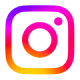
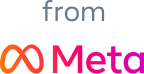

In [7]:
# Check what response return
response.text

Let's use BeautifulSoup to make it more readable.

In [8]:
soup = BeautifulSoup(response.text, "html.parser")

<!DOCTYPE html>

<html class="no-js not-logged-in client-root" lang="fr">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>
Curly Family (@curlyfamily.paris) • Photos et vidéos Instagram
</title>
<meta content="noimageindex, noarchive" name="robots"/>
<meta content="default" name="apple-mobile-web-app-status-bar-style"/>
<meta content="yes" name="mobile-web-app-capable"/>
<meta content="#ffffff" name="theme-color"/>
<meta content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=1, viewport-fit=cover" id="viewport" name="viewport"/>
<link href="/data/manifest.json" rel="manifest"/>
<link as="style" crossorigin="anonymous" href="/static/bundles/metro/ConsumerUICommons.css/1b0b1931b6a5.css" rel="preload" type="text/css">
<link as="style" crossorigin="anonymous" href="/static/bundles/metro/Consumer.css/ab8de826ef4b.css" rel="preload" type="text/css"/>
<link as="style" crossorigin="anonymous" href="/static/bundles/metro/Profile
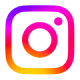
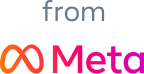

In [9]:
soup

In [10]:
soup.find_all('a')

[]

Instagram website does some JS DOM manipulation, I'm going to use `Selenium` in order to be able to find every element I need on the page.

In [11]:
from selenium import webdriver

I've create a folder 'path' in 'C:\' where I put the chromedriver application.

In [12]:
DRIVER_PATH = '\path\chromedriver'
driver = webdriver.Chrome(executable_path = DRIVER_PATH)

In [13]:
driver.get('https://www.instagram.com/curlyfamily.paris/?hl=fr')

In [14]:
driver.page_source

'<html lang="fr" class="js not-logged-in client-root js-focus-visible sDN5V" style="--desktop-nav-height:60px; --in-feed-story-item-padding:14px;"><head>\n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n        <title>Curly Family (@curlyfamily.paris) • Photos et vidéos Instagram</title>\n\n        \n        <meta name="robots" content="noimageindex, noarchive">\n        <meta name="apple-mobile-web-app-status-bar-style" content="default">\n        <meta name="mobile-web-app-capable" content="yes">\n        <meta name="theme-color" content="#ffffff">\n        <meta id="viewport" name="viewport" content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=1, viewport-fit=cover">\n        <link rel="manifest" href="/data/manifest.json">\n\n        <link rel="preload" href="/static/bundles/es6/ConsumerUICommons.css/6f0f69ed2508.css" as="style" type="text/css" crossorigin="anonymous">\n<link rel="preload" href="/static/bundle

In [15]:
soup = BeautifulSoup(driver.page_source, "html.parser")

In [16]:
soup

<html class="js not-logged-in client-root js-focus-visible sDN5V" lang="fr" style="--desktop-nav-height:60px; --in-feed-story-item-padding:14px;"><head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>Curly Family (@curlyfamily.paris) • Photos et vidéos Instagram</title>
<meta content="noimageindex, noarchive" name="robots"/>
<meta content="default" name="apple-mobile-web-app-status-bar-style"/>
<meta content="yes" name="mobile-web-app-capable"/>
<meta content="#ffffff" name="theme-color"/>
<meta content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=1, viewport-fit=cover" id="viewport" name="viewport"/>
<link href="/data/manifest.json" rel="manifest"/>
<link as="style" crossorigin="anonymous" href="/static/bundles/es6/ConsumerUICommons.css/6f0f69ed2508.css" rel="preload" type="text/css"/>
<link as="style" crossorigin="anonymous" href="/static/bundles/es6/Consumer.css/b65fc2dd59f4.css" rel="preload" type="text/css"/>
<link as=

In [17]:
# Check if it works
soup.find_all('a', href = True)

[<a href="https://l.instagram.com/?u=https%3A%2F%2Fwww.curlyfamily.fr%2F&amp;e=ATO_Up3FoNDa63Wgo7Y6XJTkV5YFNyfWCvkwHDjk_qq9xjm2jHCxczjuV-QRO0wvYel-Iel7_T1pflvR&amp;s=1" rel="me nofollow noopener noreferrer" target="_blank"><div class="_7UhW9 vy6Bb qyrsm tx0Md fDxYl T0kll">www.curlyfamily.fr</div></a>,
 <a aria-selected="true" class="_9VEo1 T-jvg" href="/curlyfamily.paris/" role="tab" tabindex="0"><span class="smsjF"><svg aria-label="" class="_8-yf5" color="#262626" fill="#262626" height="12" role="img" viewbox="0 0 24 24" width="12"><rect fill="none" height="18" stroke="currentColor" stroke-linecap="round" stroke-linejoin="round" stroke-width="2" width="18" x="3" y="3"></rect><line fill="none" stroke="currentColor" stroke-linecap="round" stroke-linejoin="round" stroke-width="2" x1="9.015" x2="9.015" y1="3" y2="21"></line><line fill="none" stroke="currentColor" stroke-linecap="round" stroke-linejoin="round" stroke-width="2" x1="14.985" x2="14.985" y1="3" y2="21"></line><line fill="none"

In [18]:
# Let's get the link of the first tag
soup.find_all('a', href = True)[0]['href']

'https://l.instagram.com/?u=https%3A%2F%2Fwww.curlyfamily.fr%2F&e=ATO_Up3FoNDa63Wgo7Y6XJTkV5YFNyfWCvkwHDjk_qq9xjm2jHCxczjuV-QRO0wvYel-Iel7_T1pflvR&s=1'

In [19]:
link_list = soup.find_all('a', href = True)

In [20]:
# Let's make a loop in order to get all links
links = []
for i in link_list:
    if i['href'].startswith('/p'):
        print('Link:', i['href'])
        links.append(i['href'])

Link: /p/CaOu9zooxHB/
Link: /p/CYG2fyTo6Zd/
Link: /p/CX1ZRlNonzx/
Link: /p/CXx5vOMgQeg/
Link: /p/CXnd_1iIONc/
Link: /p/CXiX2uboBT4/
Link: /p/CXafKVGqOtg/
Link: /p/CXT1dMIo9mq/
Link: /p/CW8AytPIwVJ/
Link: /p/CWbjrChIIKI/
Link: /p/CWTb3I3oS9M/
Link: /p/CWAa2joopy9/


In [21]:
links

['/p/CaOu9zooxHB/',
 '/p/CYG2fyTo6Zd/',
 '/p/CX1ZRlNonzx/',
 '/p/CXx5vOMgQeg/',
 '/p/CXnd_1iIONc/',
 '/p/CXiX2uboBT4/',
 '/p/CXafKVGqOtg/',
 '/p/CXT1dMIo9mq/',
 '/p/CW8AytPIwVJ/',
 '/p/CWbjrChIIKI/',
 '/p/CWTb3I3oS9M/',
 '/p/CWAa2joopy9/']

In [22]:
# Let's make it into instagram format (exemple: 'https://www.instagram.com/p/CaOu9zooxHB/')
links = []
instagram_format = 'https://www.instagram.com'

for i in link_list:
    if i['href'].startswith('/p'):
        print('Link:', instagram_format+i['href'])
        links.append(instagram_format+i['href'])

Link: https://www.instagram.com/p/CaOu9zooxHB/
Link: https://www.instagram.com/p/CYG2fyTo6Zd/
Link: https://www.instagram.com/p/CX1ZRlNonzx/
Link: https://www.instagram.com/p/CXx5vOMgQeg/
Link: https://www.instagram.com/p/CXnd_1iIONc/
Link: https://www.instagram.com/p/CXiX2uboBT4/
Link: https://www.instagram.com/p/CXafKVGqOtg/
Link: https://www.instagram.com/p/CXT1dMIo9mq/
Link: https://www.instagram.com/p/CW8AytPIwVJ/
Link: https://www.instagram.com/p/CWbjrChIIKI/
Link: https://www.instagram.com/p/CWTb3I3oS9M/
Link: https://www.instagram.com/p/CWAa2joopy9/


In [36]:
# enumerate() will return a tuple with an index
list(enumerate(links))

[(0, 'https://www.instagram.com/p/CaOu9zooxHB/'),
 (1, 'https://www.instagram.com/p/CYG2fyTo6Zd/'),
 (2, 'https://www.instagram.com/p/CX1ZRlNonzx/'),
 (3, 'https://www.instagram.com/p/CXx5vOMgQeg/'),
 (4, 'https://www.instagram.com/p/CXnd_1iIONc/'),
 (5, 'https://www.instagram.com/p/CXiX2uboBT4/'),
 (6, 'https://www.instagram.com/p/CXafKVGqOtg/'),
 (7, 'https://www.instagram.com/p/CXT1dMIo9mq/'),
 (8, 'https://www.instagram.com/p/CW8AytPIwVJ/'),
 (9, 'https://www.instagram.com/p/CWbjrChIIKI/'),
 (10, 'https://www.instagram.com/p/CWTb3I3oS9M/'),
 (11, 'https://www.instagram.com/p/CWAa2joopy9/')]

Now that we have all the links for each image.

We want to have to have the image in HD, so we need to get the HD link.

Let's try to to get it for 1 image first: https://www.instagram.com/p/CaOu9zooxHB/.

In [27]:
# We need to open a new webdriver
driver2 = webdriver.Chrome(executable_path = DRIVER_PATH)
driver2.get('https://www.instagram.com/curlyfamily.paris/?hl=fr')

In [28]:
soup2 = BeautifulSoup(driver2.page_source, "html.parser")

In [29]:
# find_all return a list so we need to take the first element each time ([0])
soup2.find_all('div', {'class': 'KL4Bh'})[0].find_all('img')[0]['src']

'https://instagram.frun2-1.fna.fbcdn.net/v/t51.2885-15/274254218_468876794773545_5374476064585812600_n.webp?stp=dst-jpg_e35&_nc_ht=instagram.frun2-1.fna.fbcdn.net&_nc_cat=109&_nc_ohc=bsbKBmfpAz4AX_QqD2A&edm=ABfd0MgBAAAA&ccb=7-5&oh=00_AT-yyBs73uhlhjO2LCICN_EOFS5jMs_-LnAoG7OZ_4yflA&oe=628EA77F&_nc_sid=7bff83'

Now that we have the HD image, we need to save it. Let's make a function to do it.

We're going to use `urllib`, it's is a package that collects several modules working with URLs:
* urllib.request to open and read URLs ;
* urllib.error containing exceptions raised by urllib.request;
* urllib.parse to parse URLs;
* urllib.robotparser to analyze robots.txt files.

In [33]:
# open("wb") --> indicates that the file is opened for writing in binary mode.
def download_image(url, destination = 'PATH_TO_YOUR_FOLDER/images/'):
    resource = urllib.request.urlopen(url)
    filename = destination + url[-8:]+".jpg"
    output = open(filename, "wb")
    output.write(resource.read())
    output.close

In [34]:
# Let's try it for 1 image
download_image('https://instagram.frun2-1.fna.fbcdn.net/v/t51.2885-15/274254218_468876794773545_5374476064585812600_n.webp?stp=dst-jpg_e35&_nc_ht=instagram.frun2-1.fna.fbcdn.net&_nc_cat=109&_nc_ohc=bsbKBmfpAz4AX_QqD2A&edm=ABfd0MgBAAAA&ccb=7-5&oh=00_AT-yyBs73uhlhjO2LCICN_EOFS5jMs_-LnAoG7OZ_4yflA&oe=628EA77F&_nc_sid=7bff83')

### Let's put it all together

In [40]:
# i = index of links and j = url
for i, j in enumerate(links):
    driver_insta = webdriver.Chrome(executable_path = DRIVER_PATH)
    driver_insta.get(j)
    soup_insta = BeautifulSoup(driver_insta.page_source, "html.parser")
    image_link = soup_insta.find_all('div', {'class': 'KL4Bh'})[0].find_all('img')[0]['src']
    download_image(image_link)
    driver_insta.quit()

IndexError: list index out of range

Reminder : It stops because it doesn't work if there is a video on the instagram page.